<a href="https://colab.research.google.com/github/evroth/gsb545repo/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm: Take-Home Portion

**Airline Passenger Satisfaction**

The two main questions we want to answer:

1. Can you predict passenger satisfaction?

2. What factors are associated with customer satisfaction?

## The Data

In [1]:
import pandas as pd

In [38]:
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")

In [3]:
df1.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [4]:
len(df1)

25976

In [5]:
df2.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [136]:
len(df2)

103904

*Clean a little to merge them up*

In [7]:
df1.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [39]:
df1 = df1.dropna()

In [40]:
len(df1)

25893

In [41]:
df2.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [42]:
df2 = df2.dropna()

In [43]:
len(df2)

103594

In [44]:
df1.sample(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
16500,16500,7165,Male,Loyal Customer,38,Business travel,Eco,135,4,3,...,4,3,5,3,2,3,4,0,43.0,neutral or dissatisfied
16139,16139,20913,Male,disloyal Customer,24,Business travel,Eco,689,3,3,...,4,1,4,5,1,5,4,0,19.0,neutral or dissatisfied
5571,5571,70228,Female,Loyal Customer,66,Personal Travel,Eco,1068,2,5,...,4,4,2,1,4,4,4,0,0.0,neutral or dissatisfied
19578,19578,83488,Female,disloyal Customer,26,Business travel,Business,946,4,0,...,4,3,3,5,3,4,4,0,10.0,neutral or dissatisfied
16956,16956,4420,Male,disloyal Customer,22,Business travel,Eco,762,0,0,...,4,5,4,5,3,5,4,0,0.0,satisfied


In [45]:
df2.sample(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
28746,28746,9705,Male,Loyal Customer,12,Personal Travel,Eco,212,2,1,...,5,2,2,4,2,3,5,0,0.0,neutral or dissatisfied
25431,25431,124623,Male,Loyal Customer,31,Business travel,Eco,1671,4,2,...,4,5,1,3,4,4,4,0,0.0,satisfied
36338,36338,28144,Male,Loyal Customer,13,Business travel,Eco,569,2,3,...,2,2,1,3,2,3,2,0,0.0,neutral or dissatisfied
7978,7978,120585,Female,Loyal Customer,35,Business travel,Business,980,3,3,...,3,3,3,3,4,3,4,8,45.0,neutral or dissatisfied
49135,49135,4054,Female,Loyal Customer,10,Personal Travel,Eco,483,1,0,...,3,4,5,5,5,4,3,24,2.0,neutral or dissatisfied


*Merge the two*

In [46]:
df = pd.concat([df1, df2], axis=0)

In [47]:
df.sample(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
49831,49831,116541,Male,Loyal Customer,18,Personal Travel,Eco,337,4,4,...,5,5,5,5,4,4,5,0,0.0,neutral or dissatisfied
99589,99589,2836,Female,disloyal Customer,59,Business travel,Eco,475,2,4,...,3,1,5,4,3,3,3,1,0.0,neutral or dissatisfied
100929,100929,90801,Female,Loyal Customer,49,Business travel,Business,581,3,3,...,4,4,4,4,5,4,5,0,0.0,satisfied
23817,23817,63556,Male,Loyal Customer,55,Business travel,Eco Plus,1009,1,3,...,1,3,5,3,1,3,1,0,0.0,neutral or dissatisfied
102644,102644,83158,Male,disloyal Customer,24,Business travel,Business,957,4,4,...,4,3,2,4,4,4,4,14,15.0,satisfied


In [48]:
len(df) == len(df1)+len(df2)

True

*Drop the first row and id*

In [49]:
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)
df.sample(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2044,Female,Loyal Customer,23,Business travel,Business,3264,3,2,2,2,...,3,4,4,4,1,3,3,0,0.0,neutral or dissatisfied
25029,Male,Loyal Customer,14,Personal Travel,Eco,119,4,3,4,5,...,5,4,1,4,5,4,5,123,123.0,neutral or dissatisfied
17979,Male,Loyal Customer,47,Business travel,Eco Plus,1010,3,1,1,1,...,4,2,5,3,3,3,4,16,19.0,neutral or dissatisfied
18116,Male,disloyal Customer,32,Business travel,Business,802,1,1,1,3,...,4,3,5,5,4,5,4,0,0.0,neutral or dissatisfied
70133,Female,disloyal Customer,25,Business travel,Eco,817,2,2,2,4,...,5,2,4,4,3,4,5,0,0.0,neutral or dissatisfied


In [50]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

## Exploratory Analysis

*Some Summary Stats*

In [19]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


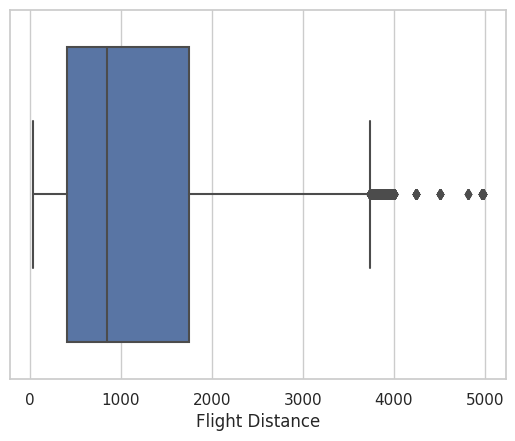

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.boxplot(x = df['Flight Distance'], data = df)
plt.show()

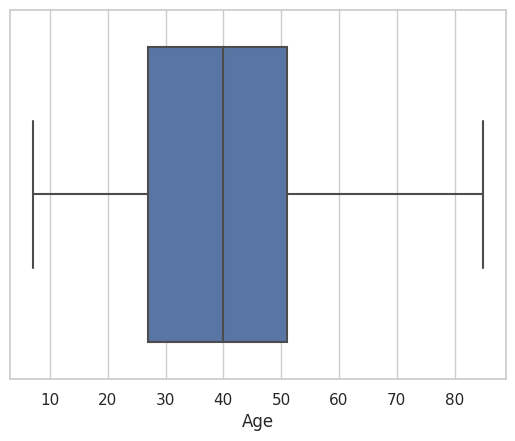

In [21]:
sns.boxplot(x = df['Age'], data = df)
plt.show()

<Axes: xlabel='Departure Delay in Minutes'>

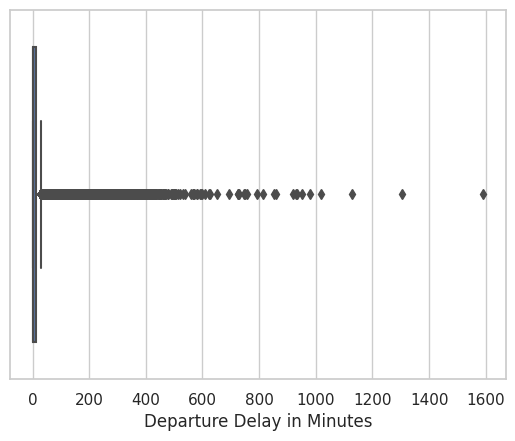

In [22]:
sns.boxplot(x=df["Departure Delay in Minutes"])

In [23]:
df.describe(include = ['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129487,129487,129487,129487,129487
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65703,105773,89445,61990,73225


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The distribution of the outcome variable of interest:

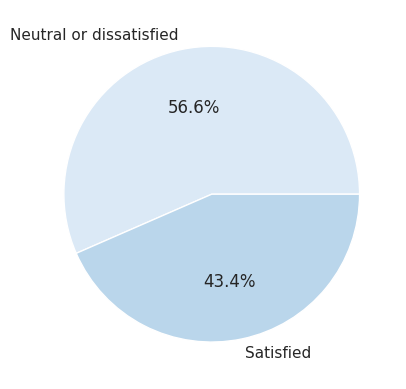

In [25]:
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("Blues"), autopct = '%1.1f%%')
pass

A correlation matrix:

Note that it is logical that departure delay and arrival delay are very strongly correlated.

<ipython-input-26-c6548d10af62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


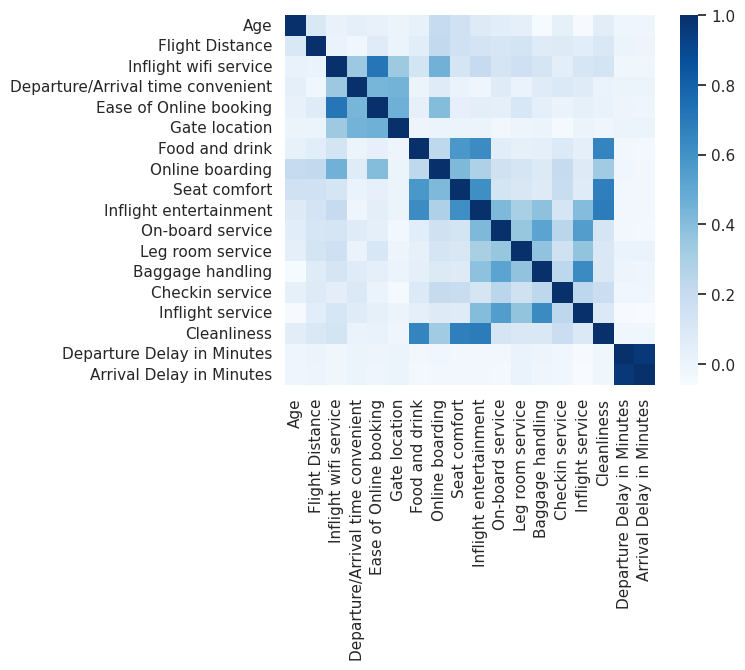

In [26]:
corr_mat = df.corr()
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

Plots to look at the distributions of categorical variables and those with responses 1-5 which, while numerical, are to be considered distinct groups

<ipython-input-27-e0ddd0d07402>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')


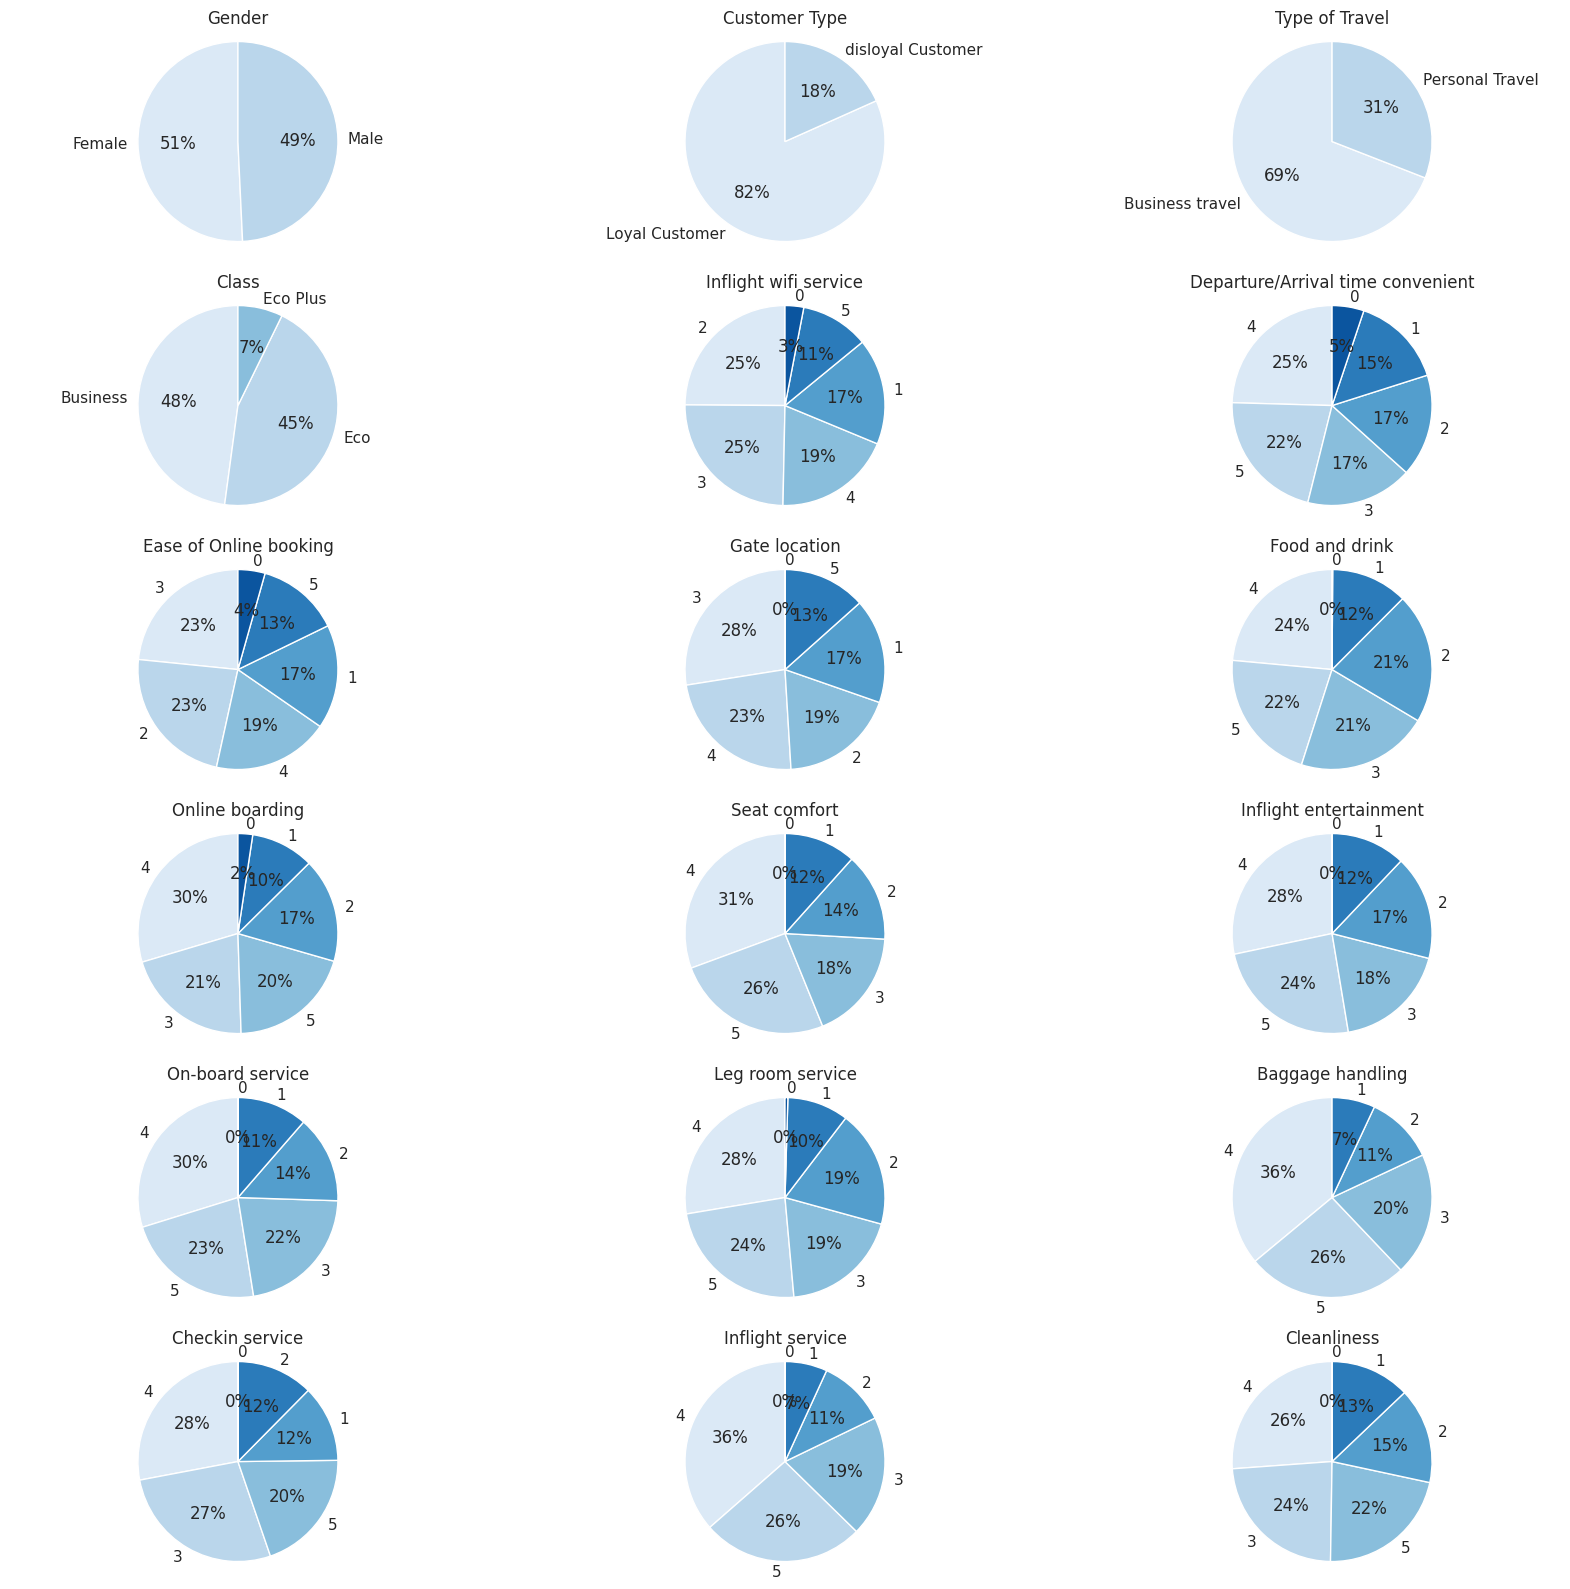

In [27]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')

categ = df.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("Blues"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

## Preprocessing

Need to re-run this because we can't have catagorical variable types in some of our models.

In [54]:
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")
df1 = df1.dropna()
df2 = df2.dropna()
df = pd.concat([df1, df2], axis=0)
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)

In [56]:
from sklearn.preprocessing import LabelEncoder

# label encoding for categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Class'] = le.fit_transform(df['Customer Type'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['satisfaction'] = le.fit_transform(df['satisfaction'])

In [57]:
# Separate features and target variable
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

In [58]:
df.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

## Building Models

XGBoost

In [167]:
from xgboost import XGBClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define the model
model = XGBClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('ROC Area Under Curve: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ROC Area Under Curve: 0.995 (0.000)


In [168]:
# define the model
model = XGBClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Model Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Model Accuracy: 0.962 (0.001)


Stacking

In [59]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [65]:
# get a stacking ensemble of models
def get_stacking():
 # define the base models
 level0 = list()
 level0.append(('knn', KNeighborsClassifier()))
 level0.append(('cart', DecisionTreeClassifier()))
 level0.append(('svm', SVC()))
 level0.append(('xbg', XGBClassifier()))
 # define meta learner model
 level1 = LogisticRegression()
 # define the stacking ensemble
 model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
 return model
 
# get a list of models to evaluate
def get_models():
 models = dict()
 models['knn'] = KNeighborsClassifier()
 models['cart'] = DecisionTreeClassifier()
 models['xbg'] = XGBClassifier()
 models['stacking'] = get_stacking()
 return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=4, n_repeats=2, random_state=1)
 scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
 return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>knn 0.804 (0.002)
>cart 0.944 (0.001)
>xbg 0.995 (0.000)


KeyboardInterrupt: ignored

took too long so I am going to go a direction that doesnt take as much time. But we can still see the performance of the knn, decision tree, and xgboost model. The best was xgb at .995, then decsion tree at .944, lastly was knn at .804.

Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

# define the model
model = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('ROC Area Under Curve: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ROC Area Under Curve: 0.987 (0.000)


This gradient boosted model has a slightly lower ROC AUC than the XGBoost model.

Random Forrest

In [69]:
from sklearn.ensemble import RandomForestClassifier
# define the model
model = RandomForestClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('ROC Area Under Curve: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ROC Area Under Curve: 0.994 (0.000)


This basic random forest model performs very well. It reports the second highest ROC AUC, falling just behind the ensemble model using XGBoost.

In conclusion, with more time and resources I believe it would be possible to build a slightly better performing model than any we built in this notebook. But with the relitively limited computation resources and time, the xgboost ensemble model performs really well. It may be hard to argue it is worth the extra resources to build a marginally better model. The XGBoost ROC AUC of .995 is excellent, as well as it's .962 accuracy.

## Important Variables

[Text(0.5, 0.8333333333333334, 'Online boarding <= 3.5\ngini = 0.491\nsamples = 129487\nvalue = [73225, 56262]'),
 Text(0.25, 0.5, 'Inflight wifi service <= 0.5\ngini = 0.255\nsamples = 65193\nvalue = [55408, 9785]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.009\nsamples = 2244\nvalue = [10, 2234]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.211\nsamples = 62949\nvalue = [55398, 7551]'),
 Text(0.75, 0.5, 'Type of Travel <= 0.5\ngini = 0.401\nsamples = 64294\nvalue = [17817, 46477]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.253\nsamples = 51191\nvalue = [7618, 43573]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.345\nsamples = 13103\nvalue = [10199, 2904]')]

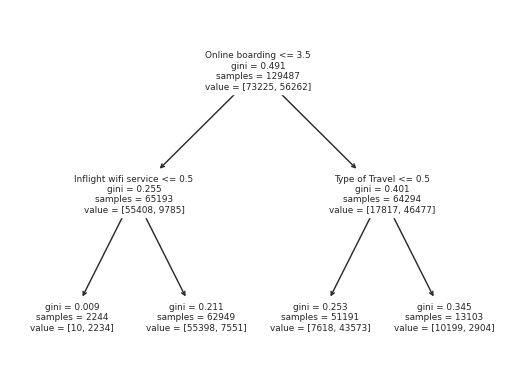

In [64]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

features = df.columns.tolist()

dtree = DecisionTreeClassifier(max_depth = 2)
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

From the simple tree above with two splits. We can see that the most important variable for predicting satisfaction was how well they rated the online boarding option the airline left. The next two best predictors were how they rated inflight wifi service and what type of travel they booked (econ or business etc)

Hopefully airline industries can gain insights from this analysis and help structure their business in ways that improve customer satisfaction.